In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
vel = np.load("part_vel.npy")
pos = np.load("pos.npy")
print(vel.shape, pos.shape)
vel_fluid = np.load("lb_vel.npy")
print(np.shape(vel_fluid))

(478, 200, 3) (478, 200, 3)
(478, 1, 1, 200, 3)


(0.0, 0.2)

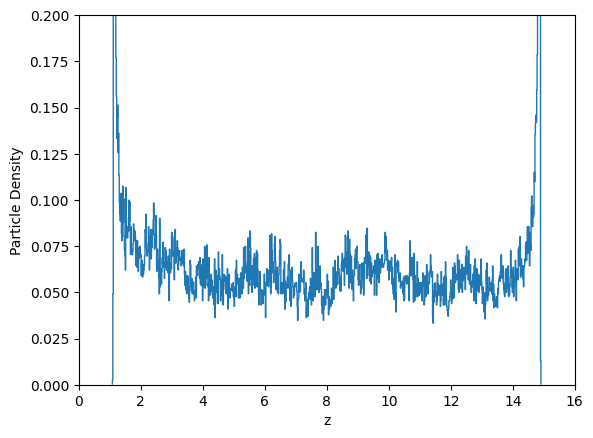

In [131]:
plt.hist(pos[:,:,2].flatten()%16, bins=1000,histtype='step',density=True)
def ion_dist(x):
    eps=87
    C=0.08
    kT=1
    q=-1
    return eps * C**2/(2*kT)*1/(np.power(np.cos(q*C/(2*kT)*x),2))
x=np.linspace(-20,30,1000)
plt.xlabel("z")
plt.ylabel("Particle Density")
plt.xlim(0,16)
plt.ylim(0,0.2)
# plt.plot(x,ion_dist(x))

/tmp/ipykernel_1273170/1981371890.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_velocity = df.groupby('position_bin')['v'].mean().reset_index()


Text(0, 0.5, 'Mean velocity')

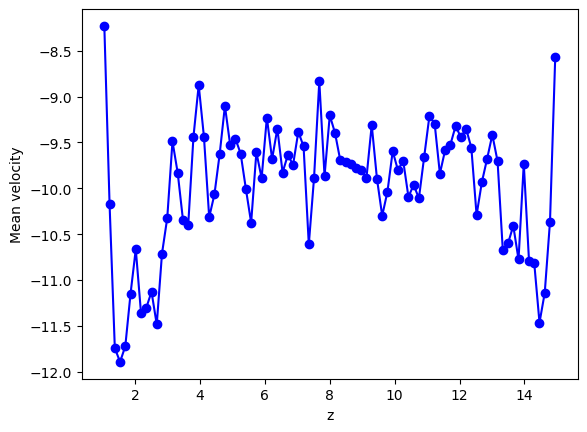

In [132]:
data = {'z': pos[:,:,2].flatten()%16,
        'v': vel[:,:,0].flatten()}
df=pd.DataFrame(data)
bins=np.linspace(0,16,100)
df['position_bin'] = pd.cut(df['z'], bins=bins, right=False)

# Group by position bins and calculate mean velocity
mean_velocity = df.groupby('position_bin')['v'].mean().reset_index()

# Extract bin centers for plotting
bin_centers = mean_velocity['position_bin'].apply(lambda x: x.left + (x.right - x.left) / 2)

# Plotting the results

plt.plot(bin_centers, mean_velocity['v'], marker='o', linestyle='-', color='blue')
plt.xlabel('z')
plt.ylabel('Mean velocity')

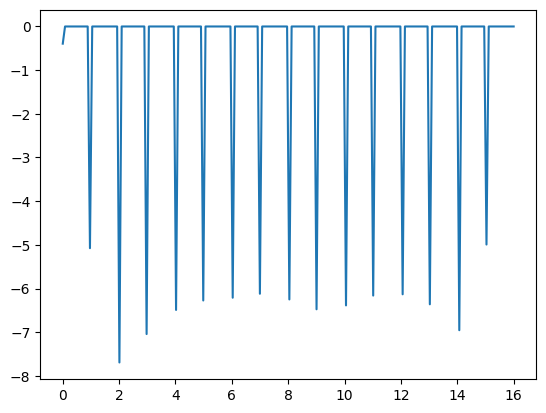

In [133]:
plt.plot(np.linspace(0,16,np.shape(vel_fluid)[3]),np.mean(vel_fluid[:,0,0,:,0] , axis=0))
def analytic(x):
    E=25
    k=1
    T=1
    eps=80*1.428E-3
    q=-1
    C=0.53
    eta=1
    d=16
    return (2*eps*E*k*T)/(eta*q) *( np.log((np.cos(q*C/(2*k*T)*x))) )#- np.log(np.cos(d*q*C/(4*k*T))))


# plt.plot(analytic(np.linspace(0,16,1000)))
